In [298]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt

Bayer pattern: [[0 1]
 [3 2]]
Raw Bayer data (sample): [[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]
Width: 4056, Height: 3040


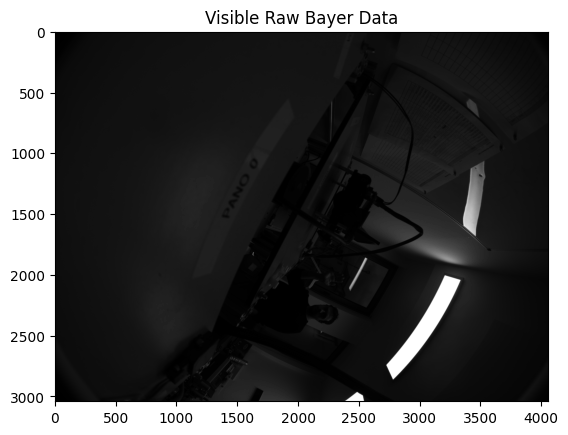

In [299]:
import rawpy
import imageio


dataset_path = './file.dng' 
with rawpy.imread(dataset_path) as raw:
    raw_image_visible = raw.raw_image_visible  # Get the visible RAW Bayer image
    raw_data         = raw.raw_image
    bayer_pattern = raw.raw_pattern  # Get the Bayer pattern (e.g., RGGB, BGGR, etc.)
    ##print(dir(raw))
    print(f"Bayer pattern: {bayer_pattern}")  # Debug information
    height, width = raw_image_visible.shape
    print("Raw Bayer data (sample):", raw_data[:10, :10])  # Print a small sample of the data
    print(f"Width: {width}, Height: {height}")


    # Display the raw Bayer data as a grayscale image
    plt.imshow(raw_data,cmap='gray')
    output_file = "first.png"
    Image.fromarray(raw_data).save(output_file)
    plt.title('Visible Raw Bayer Data')
    plt.show()


In [300]:
# Assuming raw_data is a numpy array representing the raw Bayer data
height, width = raw_data.shape
coeff = 1
# Extract the Red, Green, and Blue channels from the Bayer pattern
# Red: Pixels in positions (odd rows, odd columns)
red_channel = coeff * raw_data[::2, ::2]

# Green: Pixels in positions (even rows, even columns) + (odd rows, even columns)
green_channel = coeff * (raw_data[1::2, ::2] + raw_data[::2, 1::2]) / 2

# Blue: Pixels in positions (even rows, odd columns)
blue_channel = coeff * raw_data[1::2, 1::2]


red_channel = np.clip(red_channel, 0, 255).astype(np.uint8)
green_channel = np.clip(green_channel, 0, 255).astype(np.uint8)
blue_channel = np.clip(blue_channel, 0, 255).astype(np.uint8)

# Print out the shape of each channel to verify
print("Red channel shape:", red_channel.shape)
print("Green channel shape:", green_channel.shape)
print("Blue channel shape:", blue_channel.shape)


Red channel shape: (1520, 2028)
Green channel shape: (1520, 2028)
Blue channel shape: (1520, 2028)


Extracted patch saved to patch.raw


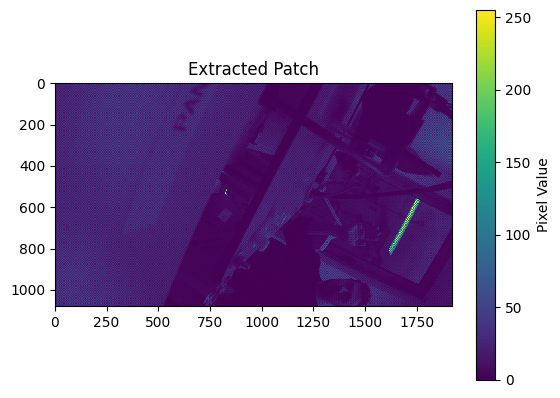

In [301]:
import numpy as np

# File and image parameters
dng_file = "./file.dng"  # Path to your DNG file
output_file = "patch.raw"
width = 4056  # Full image width
height = 3040  # Full image height
bit_depth = 8  # Bits per pixel
header_offset = 544  # Header offset based on ExifTool output

# Patch parameters
x_start = 800  # Starting x-coordinate
y_start = 1300   # Starting y-coordinate
patch_width = 1920
patch_height = 1080

# Open the DNG file and read the raw data
with open(dng_file, "rb") as f:
    # Skip the header
    f.seek(header_offset)
    
    # Read the raw Bayer data into a numpy array
    raw_data = np.fromfile(f, dtype=np.uint8 if bit_depth == 8 else np.uint16)
    raw_data = raw_data.reshape((height, width))

# Extract the patch
patch = raw_data[y_start:y_start + patch_height, x_start:x_start + patch_width]

# Save the patch as a raw binary file (optional)
patch.tofile(output_file)
print(f"Extracted patch saved to {output_file}")

# Display the patch (optional)
plt.imshow(patch, interpolation="nearest")
plt.title("Extracted Patch")
plt.colorbar(label="Pixel Value")
plt.show()


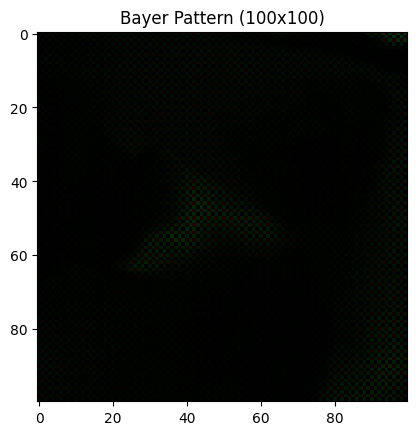

In [302]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt

# Path to the DNG file
dng_file = './file.dng'

# Read the DNG file
with rawpy.imread(dng_file) as raw:
    # Access the raw Bayer data (this is the unprocessed raw image)
    raw_data = raw.raw_image
    amp_f   = 1

    # Define a smaller region to zoom into (e.g., a 100x100 patch from the top-left corner)
    #zoom_patch = raw_data[1920:2020, 1600:1700]
    #zoom_patch = raw_data[2100:2500, 2000:2400]
    zoom_patch = raw_data[2250:2350, 2150:2250]
    #zoom_patch = raw_data[1050:1150, 1200:1300]
    # Create an empty image to hold the combined Bayer pattern with R, G, B values
    combined_image = np.zeros((zoom_patch.shape[0], zoom_patch.shape[1], 3), dtype=np.uint8)
    debayered_image       = np.zeros((zoom_patch.shape[0], zoom_patch.shape[1], 3), dtype=np.uint8)
    # Loop through the Bayer pattern and assign the color channels
    for i in range(zoom_patch.shape[0]):
        for j in range(zoom_patch.shape[1]):
            if i % 2 == 0 and j % 2 == 0:  # Red (even rows, even columns)
                combined_image[i, j, 0] = amp_f * zoom_patch[i, j]  # Red channel
            elif i % 2 == 0 and j % 2 != 0:  # Green (even rows, odd columns)
                combined_image[i, j, 1] = amp_f * zoom_patch[i, j]  # Green channel
            elif i % 2 != 0 and j % 2 == 0:  # Green (odd rows, even columns)
                combined_image[i, j, 1] = amp_f * zoom_patch[i, j]  # Green channel
            else:  # Blue (odd rows, odd columns)
                combined_image[i, j, 2] = amp_f * zoom_patch[i, j]  # Blue channel






    # Plot the combined Bayer pattern image
    plt.imshow(combined_image)
    plt.title('Bayer Pattern (100x100)')
    plt.show()
    output_file = "bayern_pattern.png"
    Image.fromarray(combined_image).save(output_file)

Red channel shape: (50, 50)
Green channel shape: (50, 50)
Blue channel shape: (50, 50)


Text(0.5, 1.0, 'Blue Channel')

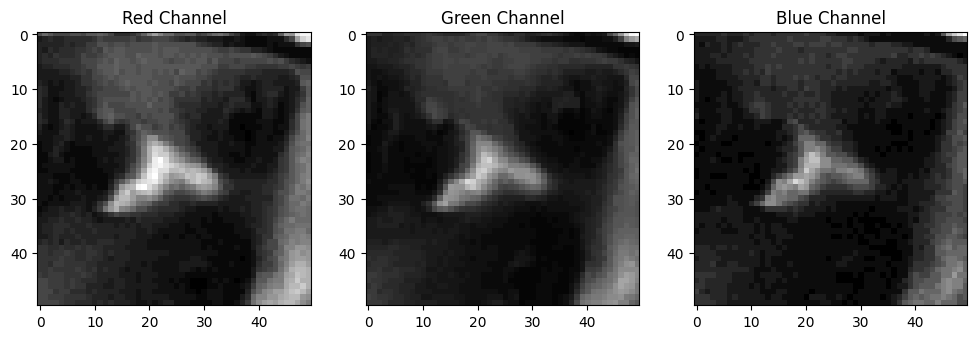

In [303]:
# Extract the Red, Green, and Blue channels from the Bayer pattern
# Red: Pixels in positions (odd rows, odd columns)
red_channel = zoom_patch[::2, ::2]

# Green: Pixels in positions (even rows, even columns) + (odd rows, even columns)
green_channel = (zoom_patch[::2, 1::2] + zoom_patch[1::2, ::2]) / 2

# Blue: Pixels in positions (even rows, odd columns)
blue_channel = zoom_patch[1::2, 1::2]


green_channel = np.clip(green_channel, 0, 255).astype(np.uint8)
blue_channel  = np.clip(blue_channel, 0, 255).astype(np.uint8)
red_channel   = np.clip(red_channel, 0, 255).astype(np.uint8)

# Print out the shape of each channel to verify
print("Red channel shape:", red_channel.shape)
print("Green channel shape:", green_channel.shape)
print("Blue channel shape:", blue_channel.shape)
# Plot the channels
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')




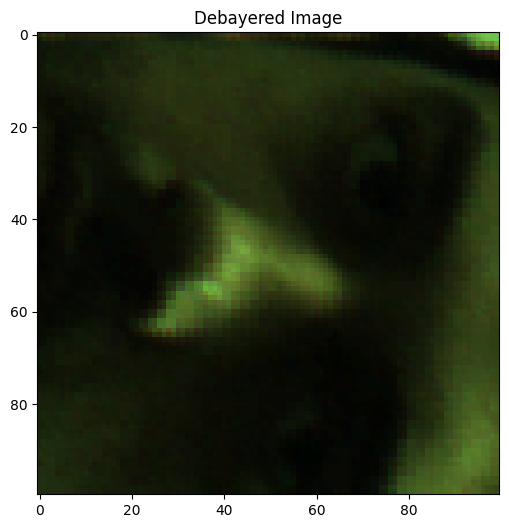

In [304]:
import numpy as np
import matplotlib.pyplot as plt



# Scaling factor
amp_f = 4.0

# Initialize combined RGB image
combined_image = np.zeros((100, 100, 3), dtype=float)

# Debayering process
for i in range(100):
    for j in range(100):
        if i % 2 == 0 and j % 2 == 0:  # Red (even rows, even columns)
            combined_image[i, j, 0] = amp_f * zoom_patch[i, j]  # Red channel
            combined_image[i, j, 1] = amp_f * ((zoom_patch[min(i+1, 99), j] + zoom_patch[i, min(j+1, 99)]) / 2)
            combined_image[i, j, 2] = amp_f * (
                zoom_patch[min(i+1, 99), min(j+1, 99)]
                if i == 0 or j == 0
                else (zoom_patch[min(i+1, 99), min(j+1, 99)] + zoom_patch[max(i-1, 0), max(j-1, 0)]) / 2
            )

        elif i % 2 == 0 and j % 2 != 0:  # Green (even rows, odd columns)
            combined_image[i, j, 0] = amp_f * (
                zoom_patch[i, max(j-1, 0)]
                if j == 99
                else (zoom_patch[i, max(j-1, 0)] + zoom_patch[i, min(j+1, 99)]) / 2
            )
            combined_image[i, j, 1] = amp_f * zoom_patch[i, j]  # Green channel
            combined_image[i, j, 2] = amp_f * (
                zoom_patch[min(i+1, 99), j]
                if i == 0
                else (zoom_patch[max(i-1, 0), j] + zoom_patch[min(i+1, 99), j]) / 2
            )

        elif i % 2 != 0 and j % 2 == 0:  # Green (odd rows, even columns)
            combined_image[i, j, 0] = amp_f * (
                zoom_patch[max(i-1, 0), j]
                if i == 99
                else (zoom_patch[max(i-1, 0), j] + zoom_patch[min(i+1, 99), j]) / 2
            )
            combined_image[i, j, 1] = amp_f * zoom_patch[i, j]  # Green channel
            combined_image[i, j, 2] = amp_f * (
                zoom_patch[i, min(j+1, 99)]
                if j == 0
                else (zoom_patch[i, max(j-1, 0)] + zoom_patch[i, min(j+1, 99)]) / 2
            )

        else:  # Blue (odd rows, odd columns)
            combined_image[i, j, 0] = amp_f * (
                zoom_patch[max(i-1, 0), max(j-1, 0)]
                if i == 99 or j == 99
                else (zoom_patch[max(i-1, 0), max(j-1, 0)] + zoom_patch[min(i+1, 99), min(j+1, 99)]) / 2
            )
            combined_image[i, j, 1] = amp_f * (
                (zoom_patch[max(i-1, 0), j] + zoom_patch[i, max(j-1, 0)]) / 2
            )
            combined_image[i, j, 2] = amp_f * zoom_patch[i, j]  # Blue channel

# Convert to uint8 for display
combined_image = np.clip(combined_image, 0, 255).astype(np.uint8)
# Apply white balance scaling

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(combined_image)
plt.title("Debayered Image")
plt.axis("on")
plt.show()


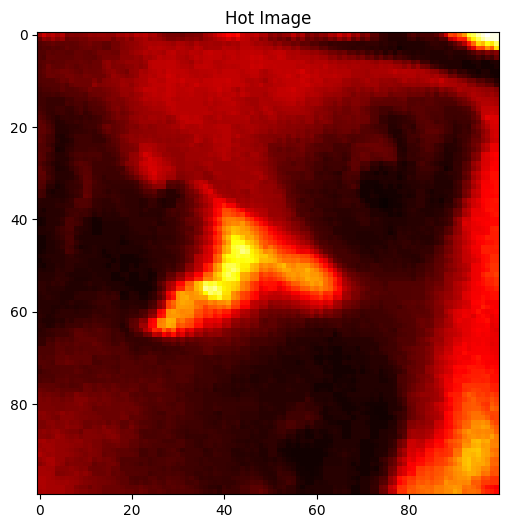

In [305]:
gray_image = 0.299 * combined_image[:,:,0] + 0.587 * combined_image[:,:,1] + 0.114 * combined_image[:,:,2]
# Clip and convert to uint8 for display
gray_image = np.clip(gray_image, 0, 255).astype(np.uint8)

# Step 3: Display the Grayscale Image
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='hot')  # Display as grayscale
plt.title("Hot Image")
plt.axis("on")
plt.show()

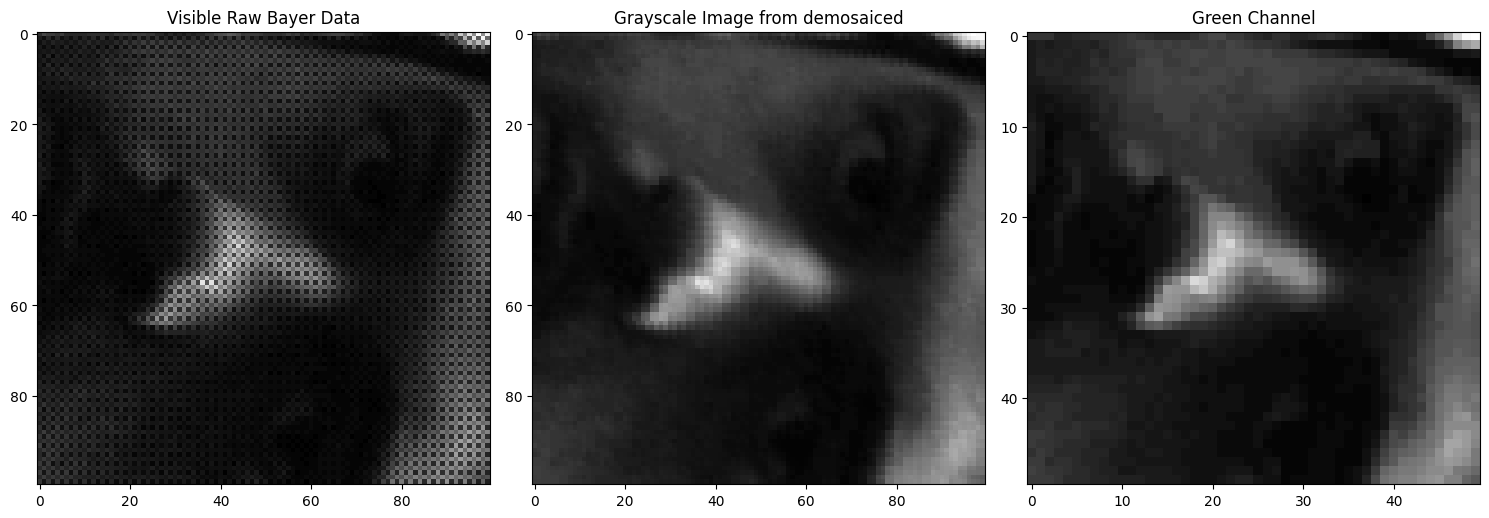

In [306]:
# Create a single figure for all subplots (side by side)
plt.figure(figsize=(15, 5))  # Adjust the figure size to fit the plots side by side

# Subplot 1: Raw Bayer Data
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
plt.imshow(raw_data[2250:2350, 2150:2250], cmap='gray')
plt.title("Visible Raw Bayer Data")
plt.axis("on")  # Remove axes for cleaner visualization

# Subplot 2: Grayscale Image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image from demosaiced")
plt.axis("on")

# Subplot 3: Green Channel
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
plt.imshow(green_channel, cmap='gray')
plt.title("Green Channel")
plt.axis("on")

# Display all subplots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()